**Forecasting Nigeria Fuel Price from 2024 to 2030 using the ARIMA model**
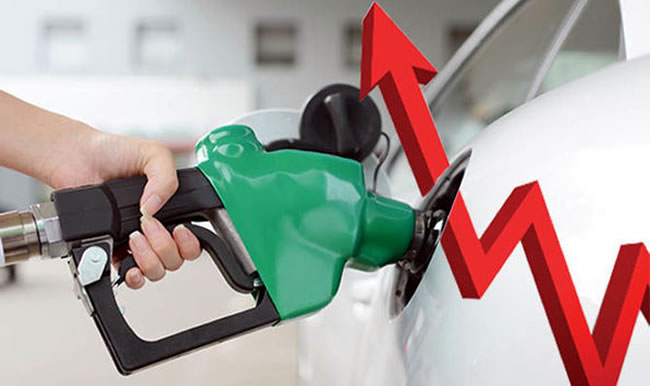

---



In [ ]:
!pip install pmdarima #installing the pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.5 MB/s eta 0:00:00


**Libraries importation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import statsmodels.api as sm

**Loading and cleaning the dataset using pandas**

In [ ]:
fuel_prices = pd.read_csv('/content/Minitab (1) (1).csv')


In [ ]:
fuel_prices.head()


,Year,Price
0,1966,0.06
1,1967,0.06
2,1968,0.06
3,1969,0.06
4,1970,0.06


In [ ]:
# Convert date column to datetime
fuel_prices['Year'] = pd.to_datetime(fuel_prices.Year, format='%Y')

# Set date column as index
fuel_prices.set_index('Year', inplace=True)


In [ ]:
# drop NAN

fuel_prices.dropna(inplace=True)

In [ ]:
fuel_prices.head()

,Price
Year,
1966-01-01,0.06
1967-01-01,0.06
1968-01-01,0.06
1969-01-01,0.06
1970-01-01,0.06


In [ ]:
fuel_prices.tail()

,Price
Year,
2020-01-01,170.0
2020-01-01,175.0
2021-01-01,190.0
2022-01-01,209.0
2023-01-01,217.0


**The actual plot of the fuel price **

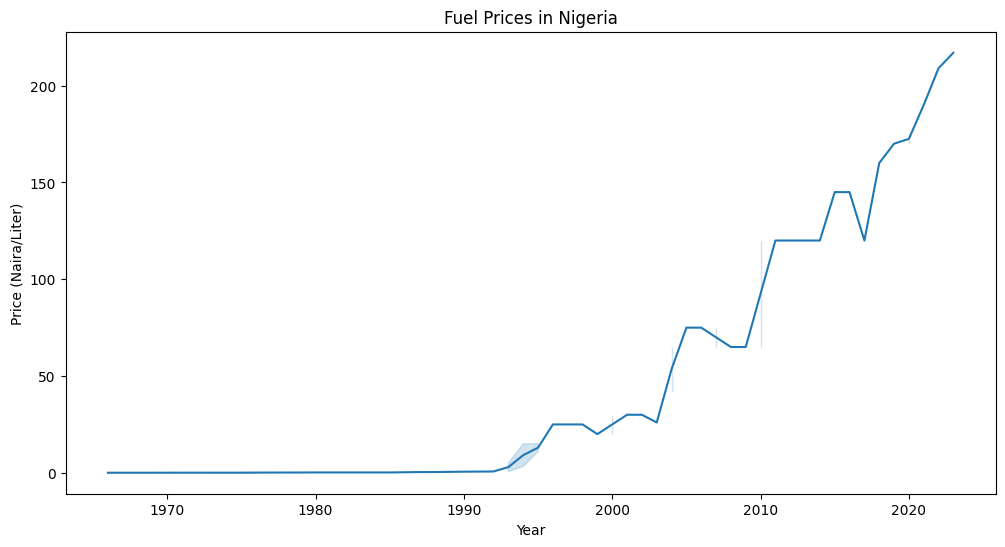

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=fuel_prices.index, y=fuel_prices['Price'])
plt.title('Fuel Prices in Nigeria')
plt.xlabel('Year')
plt.ylabel('Price (Naira/Liter)')
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test(fuel_prices['Price'])


Results of Augmented Dickey-Fuller Test:
Test Statistic                  2.466344
p-value                         0.999038
#Lags Used                      9.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


Results of Augmented Dickey-Fuller Test:
Test Statistic                  2.466344
p-value                         0.999038
#Lags Used                      9.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


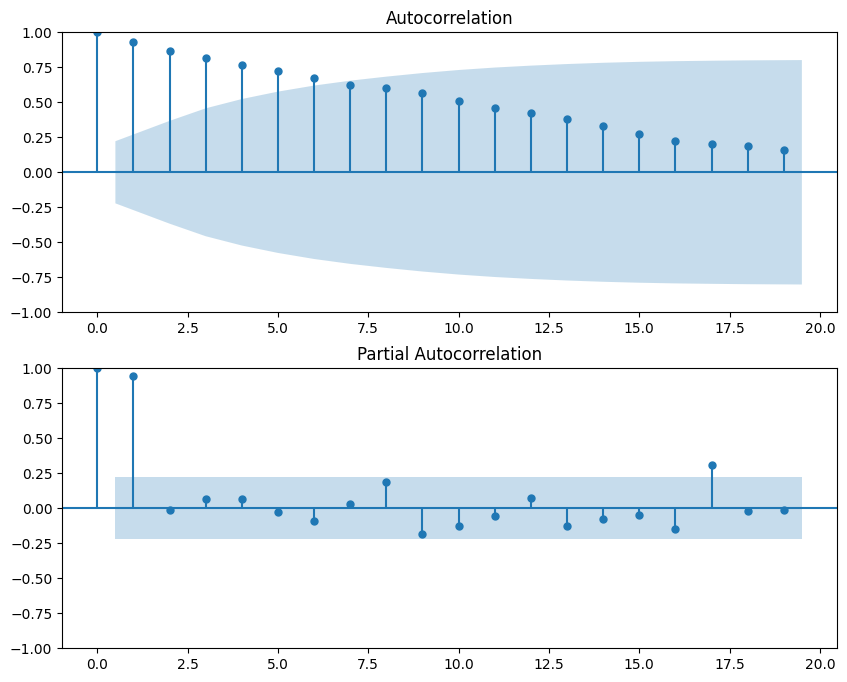

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def adf_test1(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(timeseries, ax=ax[0])
    plot_pacf(timeseries, ax=ax[1])
    plt.show()

adf_test1(fuel_prices['Price'])


**Obtaining the ACF and PACF plot after the second order differencing**

Results of Augmented Dickey-Fuller Test:
Test Statistic                  2.466344
p-value                         0.999038
#Lags Used                      9.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


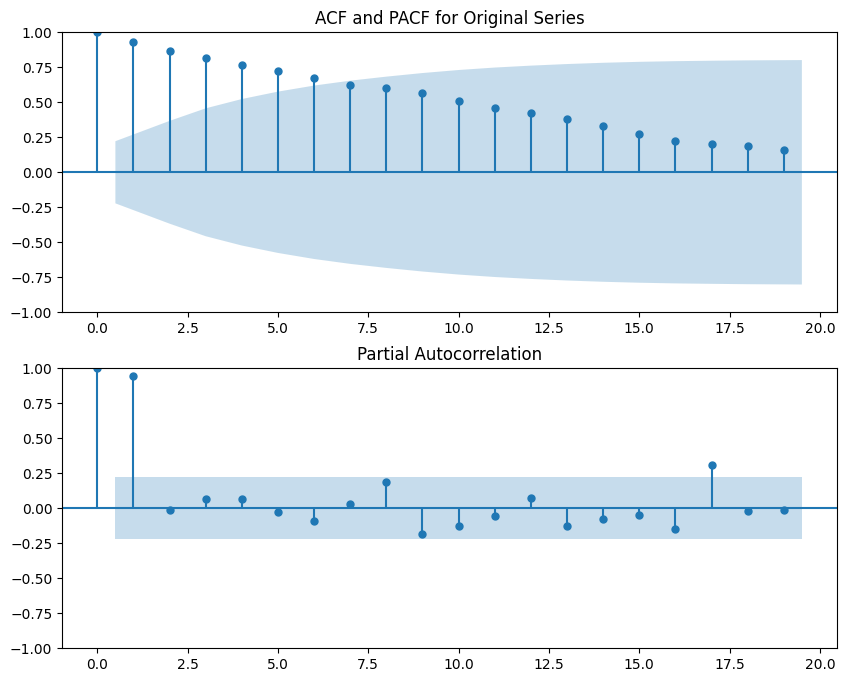

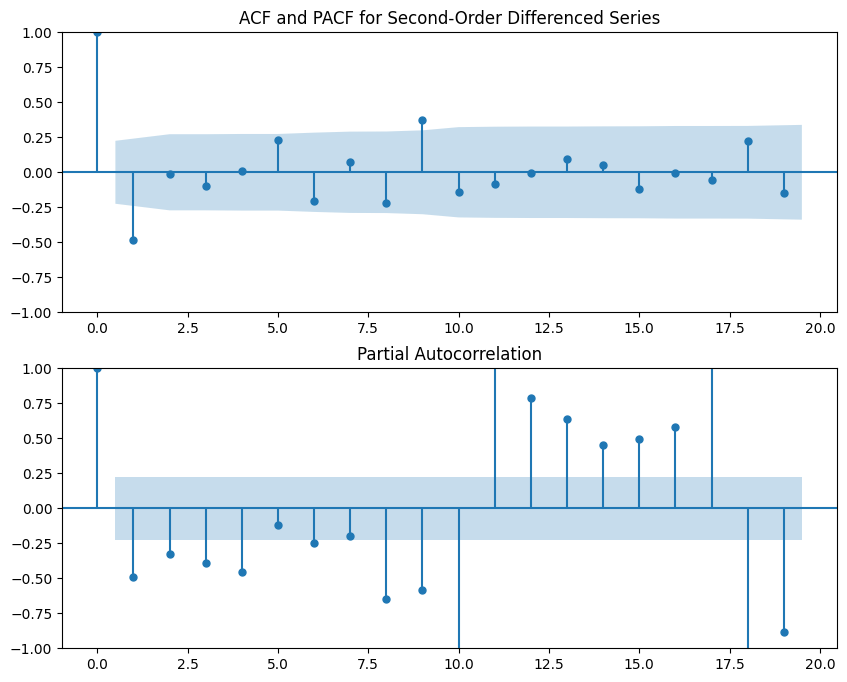

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def adf_test2(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    # Plot ACF and PACF for original series
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(timeseries, ax=ax[0])
    plot_pacf(timeseries, ax=ax[1])
    ax[0].set(title='ACF and PACF for Original Series')
    plt.show()

    # Second-order differencing
    timeseries_diff = timeseries.diff().diff().dropna()

    # Plot ACF and PACF for differenced series
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(timeseries_diff, ax=ax[0])
    plot_pacf(timeseries_diff, ax=ax[1])
    ax[0].set(title='ACF and PACF for Second-Order Differenced Series')
    plt.show()

adf_test2(fuel_prices['Price'])

**First Order Differencing to obtain the P-value**

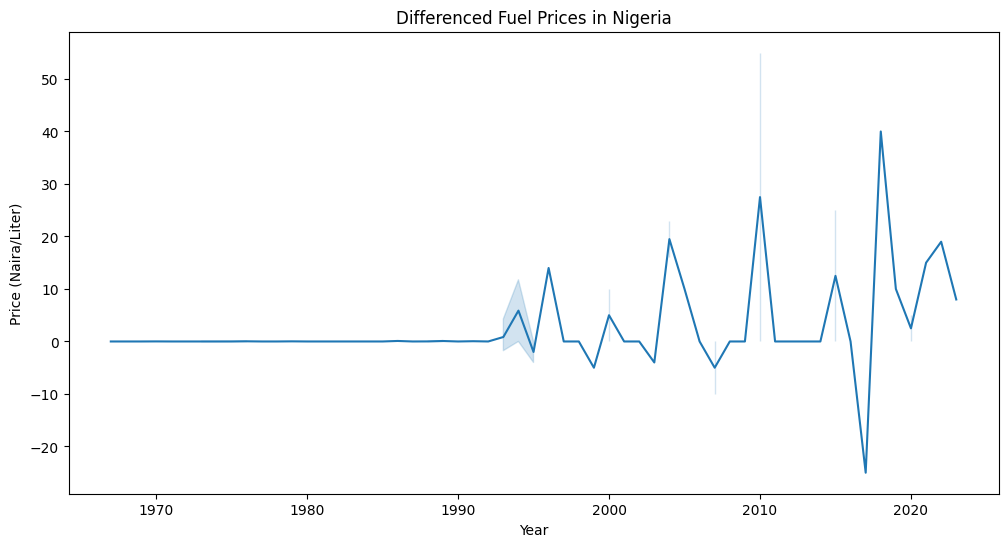

Results of Augmented Dickey-Fuller Test:
Test Statistic                  0.578202
p-value                         0.987066
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [ ]:
#First order differencing

fuel_prices_diff = fuel_prices.diff().dropna()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fuel_prices_diff.index, y=fuel_prices_diff['Price'])
plt.title('Differenced Fuel Prices in Nigeria')
plt.xlabel('Year')
plt.ylabel('Price (Naira/Liter)')
plt.show()

adf_test(fuel_prices_diff['Price'])

**Second order differencing**

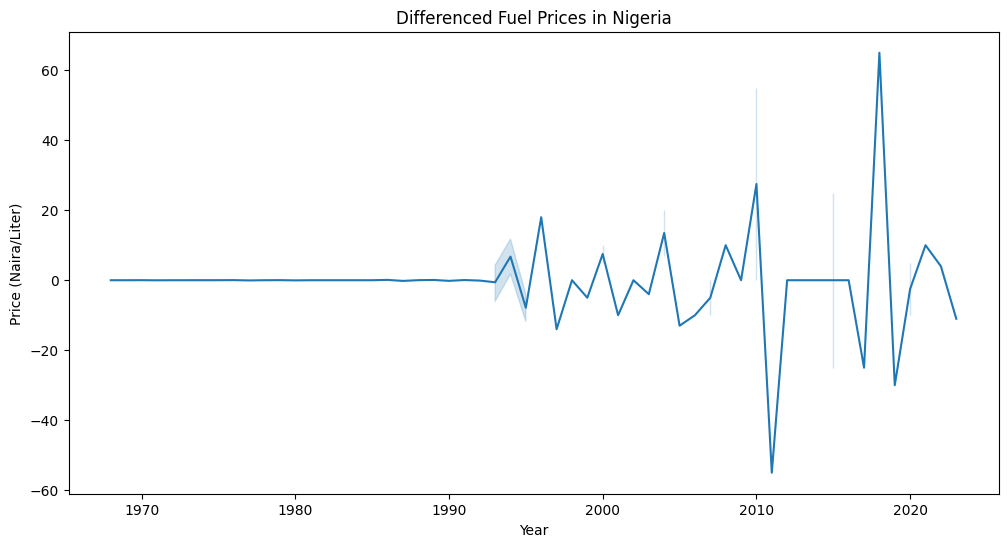

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.934444
p-value                         0.001795
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [ ]:
fuel_prices_diff = fuel_prices.diff().diff().dropna()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fuel_prices_diff.index, y=fuel_prices_diff['Price'])
plt.title('Differenced Fuel Prices in Nigeria')
plt.xlabel('Year')
plt.ylabel('Price (Naira/Liter)')
plt.show()

adf_test(fuel_prices_diff['Price'])


**Obtaining the best parameter for the ARIMA model**

In [ ]:
auto_arima_model = pm.auto_arima(fuel_prices['Price'],
                                  start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3, m=1,
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)

print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=575.462, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=577.400, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=577.388, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=579.466, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=579.139, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.282 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -285.731
Date:                Fri, 05 May 2023   AIC                            575.462
Time:                        08:13:44   BIC                            580.150
Sample:                             0   HQIC                           577.337
                                 - 78                                         
Co

**Fitting and forecasting the ARIMA model**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

# Second order differencing of the data
train_diff = fuel_prices['Price'].diff().loc['1966-01-01':'2023-01-01'].dropna()

# Train the ARIMA model with the differenced data
model = ARIMA(train_diff, order=(0,1,0))
fitted_model = model.fit()

# Forecast the differenced data
forecast_diff = fitted_model.forecast(steps=7)

# Inverse transform the forecasted differenced data
last_train_val = fuel_prices['Price'].loc['2023-01-01']
forecast = np.cumsum(np.concatenate(([last_train_val], forecast_diff)))
forecast = forecast[-7:]

print(forecast)


[225. 233. 241. 249. 257. 265. 273.]


**Forecast plot for the predicted fuel price from 2024 to 2030**

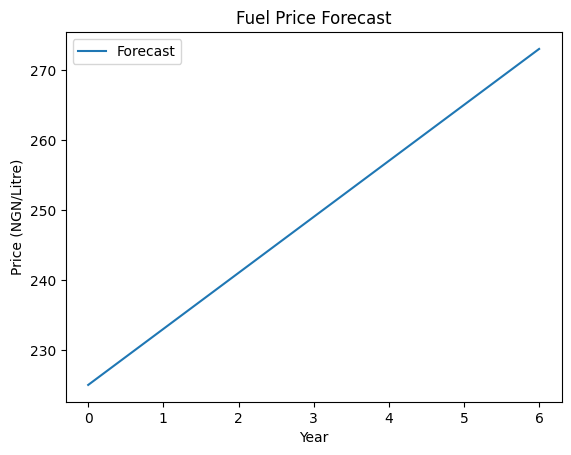

In [ ]:
# Plot forecast for next 7 years
plt.plot(forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Price (NGN/Litre)')
plt.title('Fuel Price Forecast')
plt.legend()
plt.show()